# Omdena - Extreme Weather

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import xgboost as xgb

from sklearn.model_selection import train_test_split, GridSearchCV
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

from datetime import datetime, timedelta

#import lightgbm as lgb

import tensorflow as tf
from matplotlib import pyplot

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

## Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Unzip Dataset
import zipfile 

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Projects/Omdena_xtreme_weather/data/train_data.csv.zip','r')
zip_ref.extractall()
zip_ref.close()

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Projects/Omdena_xtreme_weather/data/test_data.csv.zip','r')
zip_ref.extractall()
zip_ref.close()

In [4]:
train_path = "/content/train_data.csv"
test_path = "/content/test_data.csv"

In [5]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [6]:
train_df.head(5)

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
0,0,0.0,0.833333,9/1/14,237.00,29.02,31.64,29.57,30.73,29.71,...,-27.68,-37.21,8.32,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58
1,1,0.0,0.833333,9/2/14,228.90,29.02,31.64,29.57,30.73,29.71,...,-21.13,-36.57,8.77,21.17,4.44,48.60,27.41,-23.77,15.44,3.42
2,2,0.0,0.833333,9/3/14,220.69,29.02,31.64,29.57,30.73,29.71,...,-10.72,-34.16,6.99,32.16,5.01,48.53,19.21,-33.16,15.11,4.82
3,3,0.0,0.833333,9/4/14,225.28,29.02,31.64,29.57,30.73,29.71,...,0.33,-31.04,6.17,39.66,-1.41,50.59,8.29,-37.22,18.24,9.74
4,4,0.0,0.833333,9/5/14,237.24,29.02,31.64,29.57,30.73,29.71,...,9.83,-31.80,7.47,38.62,-5.21,54.73,-2.58,-42.30,21.91,10.95


In [7]:
train_df.describe()

,index,lat,lon,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
count,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,359800.000000,375734.000000,375734.000000,375734.000000,...,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000
mean,187866.500000,0.592766,0.517964,276.744064,10.801682,12.726739,10.099323,11.638229,10.733886,11.772646,...,-1.209959,-8.109918,6.800684,19.251970,-17.697565,-9.846867,-6.231860,16.014364,10.489945,11.296334
std,108465.207359,0.251744,0.272059,198.085182,10.952417,11.073553,10.339626,10.574276,9.403434,10.689967,...,37.317333,36.201507,38.458878,25.288526,31.946748,34.164678,27.050356,25.847455,25.070435,25.113214
min,0.000000,0.000000,0.000000,-2.310000,-14.960000,-14.970000,-11.720000,-17.560000,-13.720000,-13.330000,...,-94.570000,-89.940000,-64.870000,-39.280000,-100.560000,-106.080000,-93.980000,-52.610000,-66.110000,-57.610000
25%,93933.250000,0.409091,0.300000,104.062500,1.550000,3.650000,1.640000,3.080000,3.390000,2.970000,...,-27.200000,-33.350000,-19.650000,1.960000,-40.030000,-32.170000,-20.170000,-0.360000,-6.790000,-5.570000
50%,187866.500000,0.590909,0.533333,250.320000,9.950000,11.890000,9.490000,11.600000,10.890000,11.280000,...,-3.200000,-9.390000,2.330000,20.050000,-16.710000,-8.560000,-6.030000,18.650000,11.860000,11.650000
75%,281799.750000,0.818182,0.766667,420.010000,20.230000,22.110000,18.740000,20.360000,18.330000,20.300000,...,24.940000,17.960000,28.660000,35.090000,4.390000,10.500000,11.630000,31.210000,29.040000,29.180000
max,375733.000000,1.000000,1.000000,1185.140000,36.080000,36.030000,33.390000,34.640000,35.750000,38.350000,...,113.920000,96.550000,106.420000,91.760000,56.550000,83.890000,64.850000,90.390000,76.890000,88.660000


In [8]:
train_df.shape

(375734, 246)

In [9]:
test_df.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
0,375734,0.0,0.833333,11/1/22,339.88,30.88,30.92,29.17,31.02,29.47,...,-19.28,-39.77,-29.25,40.88,-8.31,14.91,-24.62,31.05,-23.69,6.27
1,375735,0.0,0.833333,11/2/22,334.63,30.88,30.92,29.17,31.02,29.47,...,-19.58,-43.14,-28.62,45.37,-5.42,16.97,-23.94,28.84,-20.61,14.16
2,375736,0.0,0.833333,11/3/22,337.83,30.88,30.92,29.17,31.02,29.47,...,-13.73,-44.22,-27.67,49.76,-1.31,21.44,-19.06,26.85,-16.78,13.42
3,375737,0.0,0.833333,11/4/22,345.81,30.88,30.92,29.17,31.02,29.47,...,-7.97,-49.47,-19.32,52.62,-0.44,21.65,-23.12,23.70,-18.62,10.69
4,375738,0.0,0.833333,11/5/22,357.39,30.88,30.92,29.17,31.02,29.47,...,-0.80,-56.07,-9.89,51.23,-7.57,19.86,-30.56,20.66,-25.08,19.64


In [10]:
test_df.shape

(31354, 245)

## Exploratory Data Analysis (EDA)

Locating the prediction column.

In [11]:
target = [col for col in train_df.columns if col not in test_df.columns][0]
print(target)

contest-tmp2m-14d__tmp2m


We need to change the startdate feature to datetime format since this is a time series problem. 

In [12]:
# change startdate to datetime format
train_df.startdate = pd.to_datetime(train_df.startdate)
test_df.startdate = pd.to_datetime(test_df.startdate)

In [13]:
# Columns with null data
#null_list = []
#for col in train_df.columns:
#  if train_df[col].isnull().any():
#    null_list.append(col)

#null_list

Convert startdate column to month and years.

In [14]:
class DateToMonthAndYears(BaseEstimator, TransformerMixin):
  def fit(self, X, y = None):
    return self

  def transform(self, X):
    X['startdate'] = pd.to_datetime(X['startdate'])
    X['date'] = pd.DatetimeIndex(X['startdate']).date
    X['Month'] = pd.DatetimeIndex(X['startdate']).month
    X['Year'] = pd.DatetimeIndex(X['startdate']).year
    #return X.drop(columns = 'startdate')
    return X

Remove the Index Column

In [15]:
class RemoveIndex(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self

  def transform(self, X):
    return X.drop(columns = 'index')

Locate the columns with null values and replace it with mean using Simple Imputer.

In [16]:
null_cols = []
class ObtainingNullValues(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self

  def transform(self, X):
    missing_values = []
    for col in train_df.columns:
      if(train_df[col].isnull().any()):
        null_cols.append(col)
        missing_values.append(train_df[col].isnull().sum())
    Imputer = SimpleImputer(strategy="mean")
    for col in null_cols:
      X[col] = Imputer.fit_transform(X[[col]])
    return X

Create a pipeline to perform the following tasks. 

In [17]:
from sklearn.pipeline import Pipeline

Pipe = Pipeline([
    ("Date", DateToMonthAndYears()),
    ("Index", RemoveIndex()),
    ("NullValues", ObtainingNullValues())
])

train_df = Pipe.fit_transform(train_df)
train_df.shape

(375734, 248)

In [18]:
train_df.head()

,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,...,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20,date,Month,Year
0,0.0,0.833333,2014-09-01,237.00,29.02,31.64,29.57,30.73,29.71,31.52,...,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58,2014-09-01,9,2014
1,0.0,0.833333,2014-09-02,228.90,29.02,31.64,29.57,30.73,29.71,31.52,...,21.17,4.44,48.60,27.41,-23.77,15.44,3.42,2014-09-02,9,2014
2,0.0,0.833333,2014-09-03,220.69,29.02,31.64,29.57,30.73,29.71,31.52,...,32.16,5.01,48.53,19.21,-33.16,15.11,4.82,2014-09-03,9,2014
3,0.0,0.833333,2014-09-04,225.28,29.02,31.64,29.57,30.73,29.71,31.52,...,39.66,-1.41,50.59,8.29,-37.22,18.24,9.74,2014-09-04,9,2014
4,0.0,0.833333,2014-09-05,237.24,29.02,31.64,29.57,30.73,29.71,31.52,...,38.62,-5.21,54.73,-2.58,-42.30,21.91,10.95,2014-09-05,9,2014


Plot the distribution of the time. One observation is that there is a gap between the training and test data. 

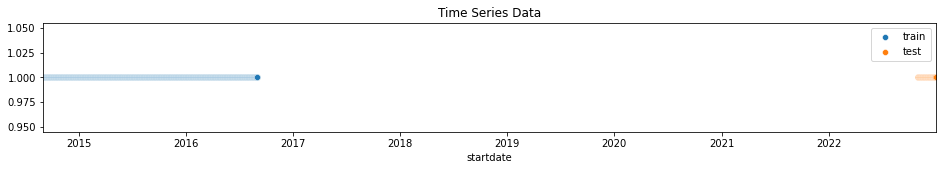

In [19]:
fig, ax = plt.subplots(1,1, figsize=(16,2))
ax.set_title('Time Series Data')
sns.scatterplot(data = train_df, x ='startdate', y=1, label='train')
sns.scatterplot(data=test_df, x='startdate', y=1, label='test')
ax.set_xlim([train_df['startdate'].iloc[0], test_df['startdate'].iloc[-1]])
plt.show()

Grouping the training data by the target feature displays that there are 514 locstions. 

In [20]:
train_df.groupby('startdate')[target].count()

startdate
2014-09-01    514
2014-09-02    514
2014-09-03    514
2014-09-04    514
2014-09-05    514
             ... 
2016-08-27    514
2016-08-28    514
2016-08-29    514
2016-08-30    514
2016-08-31    514
Name: contest-tmp2m-14d__tmp2m, Length: 731, dtype: int64

Plotting the climate regions.

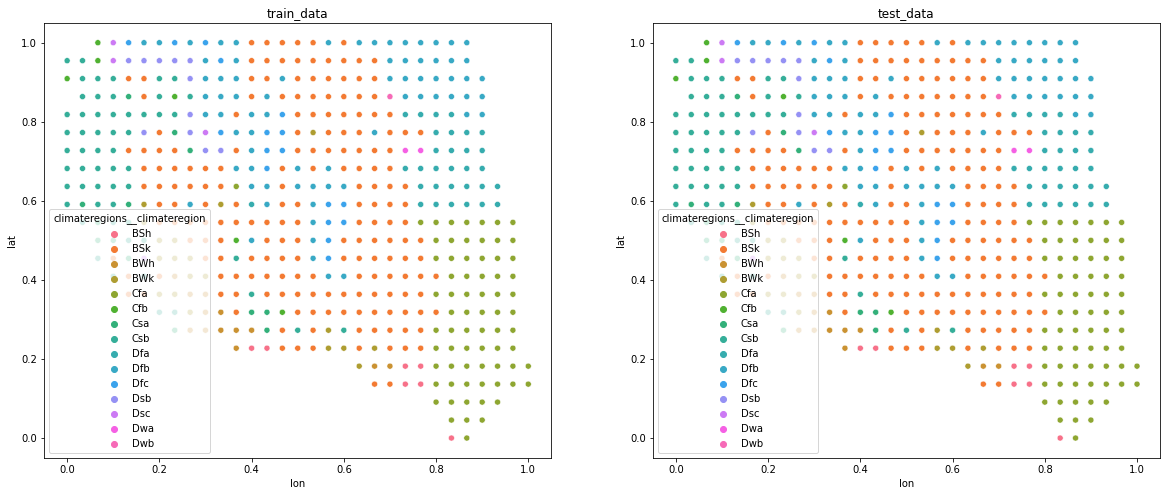

In [21]:
temp = train_df.groupby(['climateregions__climateregion','lat','lon']).size().to_frame().reset_index(drop=False)
fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.scatterplot(data=temp, y='lat', x='lon', hue='climateregions__climateregion', ax=ax[0])
ax[0].set_title('train_data')
temp = test_df.groupby(['climateregions__climateregion','lat','lon']).size().to_frame().reset_index(drop=False)
sns.scatterplot(data=temp, y='lat', x='lon', hue='climateregions__climateregion', ax=ax[1])
ax[1].set_title('test_data')
plt.show()

Text(0.5, 1.02, 'Percent of data belonging to each climate region in the train set')

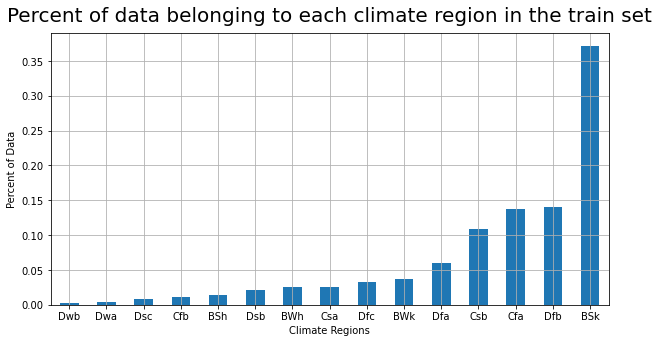

In [22]:
train_df['climateregions__climateregion'].value_counts(normalize = True).sort_values().plot(kind='bar', figsize=(10,5), rot=0)

plt.xlabel('Climate Regions')
plt.ylabel('Percent of Data')
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.grid()
plt.title("Percent of data belonging to each climate region in the train set", y=1.02, fontsize=20)

Create new feature from the lat/lon coordinates.

In [23]:
all_df = pd.concat([train_df, test_df], axis=0)

# new feature group
all_df['loc_group'] = all_df.groupby(['lat','lon']).ngroup()
display(all_df)

print(f'{all_df.loc_group.nunique()} unique locations')

# split train and test df back to original
train_df = all_df.iloc[:len(train_df)]
test_df = all_df.iloc[len(train_df):]

,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,...,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20,date,Month,Year,index,loc_group
0,0.0,0.833333,2014-09-01,237.00,29.02,31.64,29.57,30.73,29.71,31.52,...,48.13,28.09,-13.50,11.90,4.58,2014-09-01,9.0,2014.0,NaN,0
1,0.0,0.833333,2014-09-02,228.90,29.02,31.64,29.57,30.73,29.71,31.52,...,48.60,27.41,-23.77,15.44,3.42,2014-09-02,9.0,2014.0,NaN,0
2,0.0,0.833333,2014-09-03,220.69,29.02,31.64,29.57,30.73,29.71,31.52,...,48.53,19.21,-33.16,15.11,4.82,2014-09-03,9.0,2014.0,NaN,0
3,0.0,0.833333,2014-09-04,225.28,29.02,31.64,29.57,30.73,29.71,31.52,...,50.59,8.29,-37.22,18.24,9.74,2014-09-04,9.0,2014.0,NaN,0
4,0.0,0.833333,2014-09-05,237.24,29.02,31.64,29.57,30.73,29.71,31.52,...,54.73,-2.58,-42.30,21.91,10.95,2014-09-05,9.0,2014.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31349,1.0,0.866667,2022-12-27,62.72,4.60,8.71,6.05,10.08,6.39,8.42,...,11.75,-23.62,-0.24,-5.94,51.23,NaN,NaN,NaN,407083.0,574
31350,1.0,0.866667,2022-12-28,73.41,4.60,8.71,6.05,10.08,6.39,8.42,...,17.84,-22.05,-3.03,1.31,51.45,NaN,NaN,NaN,407084.0,574
31351,1.0,0.866667,2022-12-29,70.00,4.60,8.71,6.05,10.08,6.39,8.42,...,23.12,-25.60,-5.88,9.32,45.32,NaN,NaN,NaN,407085.0,574
31352,1.0,0.866667,2022-12-30,79.81,4.60,8.71,6.05,10.08,6.39,8.42,...,29.00,-27.06,-1.42,16.06,31.88,NaN,NaN,NaN,407086.0,574


575 unique locations


Locate different locations between training and test datasets. 

In [24]:
print('Locations in train dataset that are not in the test dataset')
print([c for c in train_df.loc_group.unique() if c not in test_df.loc_group.unique()])
print('\n')

print('Locations in test dataset that are not in the train dataset')
print([c for c in test_df.loc_group.unique() if c not in train_df.loc_group.unique()])
print('\n')

Locations in train dataset that are not in the test dataset
[33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 76, 101, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 181, 210, 239, 269, 300, 330, 360, 389, 418, 447, 475, 504, 533, 559]


Locations in test dataset that are not in the train dataset
[52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 75, 100, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 180, 209, 238, 268, 299, 329, 359, 388, 417, 446, 474, 503, 532, 558]




In [25]:
#truncate the original lat/lon coord and re-create the location features
scale = 14

train_df.loc[:, 'lat'] = round(train_df.lat, scale)
train_df.loc[:, 'lon'] = round(train_df.lon, scale)

test_df.loc[:, 'lat'] = round(test_df.lat, scale)
test_df.loc[:, 'lon'] = round(test_df.lon, scale)

# Concatenate train and test data
all_df = pd.concat([train_df, test_df], axis=0)

# Create new feature
all_df['loc_group'] = all_df.groupby(['lat','lon']).ngroup()
display(all_df)

print(f'{all_df.loc_group.nunique()} unique locations')

# Split back up
train_df = all_df.iloc[:len(train_df)]
test_df = all_df.iloc[len(train_df):]

print('Locations in train dataset that are not in the test dataset')
print([c for c in train_df.loc_group.unique() if c not in test_df.loc_group.unique()])
print('\n')

print('Locations in test dataset that are not in the train dataset')
print([c for c in test_df.loc_group.unique() if c not in train_df.loc_group.unique()])
print('\n')

/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,...,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20,date,Month,Year,index,loc_group
0,0.0,0.833333,2014-09-01,237.00,29.02,31.64,29.57,30.73,29.71,31.52,...,48.13,28.09,-13.50,11.90,4.58,2014-09-01,9.0,2014.0,NaN,0
1,0.0,0.833333,2014-09-02,228.90,29.02,31.64,29.57,30.73,29.71,31.52,...,48.60,27.41,-23.77,15.44,3.42,2014-09-02,9.0,2014.0,NaN,0
2,0.0,0.833333,2014-09-03,220.69,29.02,31.64,29.57,30.73,29.71,31.52,...,48.53,19.21,-33.16,15.11,4.82,2014-09-03,9.0,2014.0,NaN,0
3,0.0,0.833333,2014-09-04,225.28,29.02,31.64,29.57,30.73,29.71,31.52,...,50.59,8.29,-37.22,18.24,9.74,2014-09-04,9.0,2014.0,NaN,0
4,0.0,0.833333,2014-09-05,237.24,29.02,31.64,29.57,30.73,29.71,31.52,...,54.73,-2.58,-42.30,21.91,10.95,2014-09-05,9.0,2014.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31349,1.0,0.866667,2022-12-27,62.72,4.60,8.71,6.05,10.08,6.39,8.42,...,11.75,-23.62,-0.24,-5.94,51.23,NaN,NaN,NaN,407083.0,513
31350,1.0,0.866667,2022-12-28,73.41,4.60,8.71,6.05,10.08,6.39,8.42,...,17.84,-22.05,-3.03,1.31,51.45,NaN,NaN,NaN,407084.0,513
31351,1.0,0.866667,2022-12-29,70.00,4.60,8.71,6.05,10.08,6.39,8.42,...,23.12,-25.60,-5.88,9.32,45.32,NaN,NaN,NaN,407085.0,513
31352,1.0,0.866667,2022-12-30,79.81,4.60,8.71,6.05,10.08,6.39,8.42,...,29.00,-27.06,-1.42,16.06,31.88,NaN,NaN,NaN,407086.0,513


514 unique locations
Locations in train dataset that are not in the test dataset
[]


Locations in test dataset that are not in the train dataset
[]




Plot first three location groups. 

<AxesSubplot:xlabel='startdate', ylabel='contest-tmp2m-14d__tmp2m'>

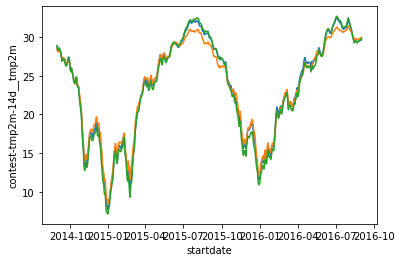

In [26]:
temp = train_df[train_df.loc_group == 0]
sns.lineplot(data=temp, x='startdate', y=target)
temp = train_df[train_df.loc_group == 1]
sns.lineplot(data=temp, x='startdate', y=target)
temp = train_df[train_df.loc_group == 2]
sns.lineplot(data=temp, x='startdate', y=target)

Locate the number of location in each climate regions. 

In [27]:
train_df['locations'] = train_df['lat'].astype(str) + ';' + train_df['lon'].astype(str)
locations = train_df[['lat','lon','climateregions__climateregion','locations']].drop_duplicates()
locations.groupby('climateregions__climateregion', as_index = False, sort=False).aggregate({'locations':'count'})

<ipython-input-27-da012a336323>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['locations'] = train_df['lat'].astype(str) + ';' + train_df['lon'].astype(str)


,climateregions__climateregion,locations
0,BSh,7
1,Cfa,71
2,BSk,191
3,BWk,19
4,BWh,13
5,Csa,13
6,Csb,56
7,Cfb,6
8,Dfb,72
9,Dsc,4


Transform climate regions from categorical to numeric format. 

<ipython-input-28-b156ef727f87>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['climateregions__climateregion'] = labelencoder.fit_transform(train_df['climateregions__climateregion'].values)


<AxesSubplot:>

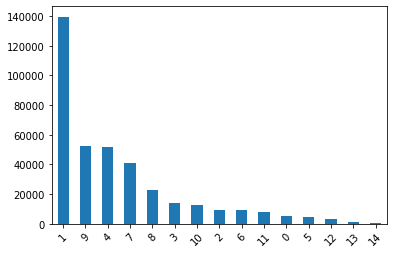

In [28]:
labelencoder = LabelEncoder()
train_df['climateregions__climateregion'] = labelencoder.fit_transform(train_df['climateregions__climateregion'].values)

train_df['climateregions__climateregion'].value_counts().plot(kind='bar', rot=45)

Transform locations column to numeric format. 

In [29]:
train_df['locations'] = labelencoder.fit_transform(train_df['locations'].values)
train_df['locations']

<ipython-input-29-1037925e655f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['locations'] = labelencoder.fit_transform(train_df['locations'].values)


0           8
1           8
2           8
3           8
4           8
         ... 
375729    513
375730    513
375731    513
375732    513
375733    513
Name: locations, Length: 375734, dtype: int64

To predict the temperature, only the correlated environmetal features were extracted from the entire dataset. 

In [30]:
df_filtered = pd.DataFrame() #creating a dataset of evironmental factors
df_filtered['startdate'] = train_df['startdate']
df_filtered['lat'] = train_df['lat']
df_filtered['lon'] = train_df['lon']
df_filtered['locations'] = train_df['locations']
df_filtered['climateregion'] = train_df['climateregions__climateregion']

df_filtered['Evaporation'] = train_df['contest-pevpr-sfc-gauss-14d__pevpr']
df_filtered['Humidity'] = train_df['contest-rhum-sig995-14d__rhum']
df_filtered['SeaLevelPressure'] = train_df['contest-slp-14d__slp']
df_filtered['Pressure'] = train_df['contest-pres-sfc-gauss-14d__pres']
df_filtered['Elevation'] = train_df['elevation__elevation']
df_filtered['Precipitation'] = train_df['contest-precip-14d__precip']
df_filtered['Precipitable_water'] = train_df['contest-prwtr-eatm-14d__prwtr']

df_filtered['Wind_10'] = train_df['contest-wind-h10-14d__wind-hgt-10']
df_filtered['Wind_100'] = train_df['contest-wind-h100-14d__wind-hgt-100']
df_filtered['Wind_500'] = train_df['contest-wind-h500-14d__wind-hgt-500']
df_filtered['Wind_850'] = train_df['contest-wind-h850-14d__wind-hgt-850']
df_filtered['Wind_long250'] = train_df['contest-wind-vwnd-250-14d__wind-vwnd-250']
df_filtered['Wind_long925'] = train_df['contest-wind-vwnd-925-14d__wind-vwnd-925']
df_filtered['Wind_zonal250'] = train_df['contest-wind-uwnd-250-14d__wind-uwnd-250']
df_filtered['Wind_zonal925'] = train_df['contest-wind-uwnd-925-14d__wind-uwnd-925']

df_filtered['Temperature'] = train_df['contest-tmp2m-14d__tmp2m']

In [31]:
df_filtered.head()

,startdate,lat,lon,locations,climateregion,Evaporation,Humidity,SeaLevelPressure,Pressure,Elevation,...,Precipitable_water,Wind_10,Wind_100,Wind_500,Wind_850,Wind_long250,Wind_long925,Wind_zonal250,Wind_zonal925,Temperature
0,2014-09-01,0.0,0.833333,8,0,237.00,81.72,101352.08,98644.97,200.0,...,42.45,31246.63,16666.81,5899.66,1535.52,-3.52,4.41,-2.56,-5.22,28.744480
1,2014-09-02,0.0,0.833333,8,0,228.90,82.56,101396.02,98686.80,200.0,...,42.66,31244.78,16667.31,5901.03,1538.00,-4.49,3.74,-2.39,-5.20,28.370585
2,2014-09-03,0.0,0.833333,8,0,220.69,83.29,101429.25,98712.85,200.0,...,43.23,31239.27,16668.39,5902.18,1540.32,-5.44,3.40,-2.76,-5.00,28.133059
3,2014-09-04,0.0,0.833333,8,0,225.28,83.26,101440.85,98711.70,200.0,...,43.11,31232.86,16667.39,5903.07,1541.10,-5.76,3.29,-3.00,-4.61,28.256798
4,2014-09-05,0.0,0.833333,8,0,237.24,82.50,101419.53,98686.46,200.0,...,42.98,31226.16,16665.65,5903.36,1539.73,-6.09,3.27,-3.40,-4.25,28.372353


In [32]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375734 entries, 0 to 375733
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   startdate           375734 non-null  datetime64[ns]
 1   lat                 375734 non-null  float64       
 2   lon                 375734 non-null  float64       
 3   locations           375734 non-null  int64         
 4   climateregion       375734 non-null  int64         
 5   Evaporation         375734 non-null  float64       
 6   Humidity            375734 non-null  float64       
 7   SeaLevelPressure    375734 non-null  float64       
 8   Pressure            375734 non-null  float64       
 9   Elevation           375734 non-null  float64       
 10  Precipitation       375734 non-null  float64       
 11  Precipitable_water  375734 non-null  float64       
 12  Wind_10             375734 non-null  float64       
 13  Wind_100            375734 no

In [33]:
df_filtered.describe()

,lat,lon,locations,climateregion,Evaporation,Humidity,SeaLevelPressure,Pressure,Elevation,Precipitation,Precipitable_water,Wind_10,Wind_100,Wind_500,Wind_850,Wind_long250,Wind_long925,Wind_zonal250,Wind_zonal925,Temperature
count,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000
mean,0.592766,0.517964,256.500000,4.538911,276.744064,62.766512,101605.888627,89235.103399,1078.657588,22.859842,14.298038,31071.557568,16404.561991,5728.370672,1500.148857,-0.800131,1.006341,19.467550,1.035913,11.858568
std,0.251744,0.272059,148.378936,3.495338,198.085182,17.399704,406.331364,6509.231609,669.219573,32.109036,8.142212,343.019882,196.007401,123.805703,28.774810,8.723436,2.086804,8.845528,1.696025,9.867901
min,0.000000,0.000000,0.000000,0.000000,-2.310000,13.250000,100379.210000,74839.940000,0.000000,0.000000,2.700000,29943.150000,15750.120000,5289.250000,1353.540000,-32.880000,-8.000000,-10.060000,-6.840000,-20.358963
25%,0.409091,0.300000,128.000000,1.000000,104.062500,50.090000,101306.620000,83598.717500,500.000000,3.790000,8.350000,30811.990000,16252.322500,5644.070000,1484.780000,-6.260000,-0.200000,13.700000,-0.080000,4.818231
50%,0.590909,0.533333,256.500000,4.000000,250.320000,64.910000,101511.245000,89444.930000,900.000000,12.180000,12.050000,31016.820000,16381.730000,5732.220000,1503.560000,-0.280000,0.770000,19.640000,0.950000,12.285770
75%,0.818182,0.766667,385.000000,8.000000,420.010000,77.410000,101844.870000,94683.830000,1700.000000,28.840000,17.820000,31374.780000,16585.427500,5827.680000,1519.670000,5.120000,2.010000,25.400000,2.080000,19.441170
max,1.000000,1.000000,513.000000,14.000000,1185.140000,98.220000,103275.840000,102845.570000,3100.000000,502.630000,52.660000,31803.030000,16762.800000,5958.200000,1588.910000,29.220000,11.880000,52.970000,8.110000,37.238782


Plot the correlation chart between the extracted features. 

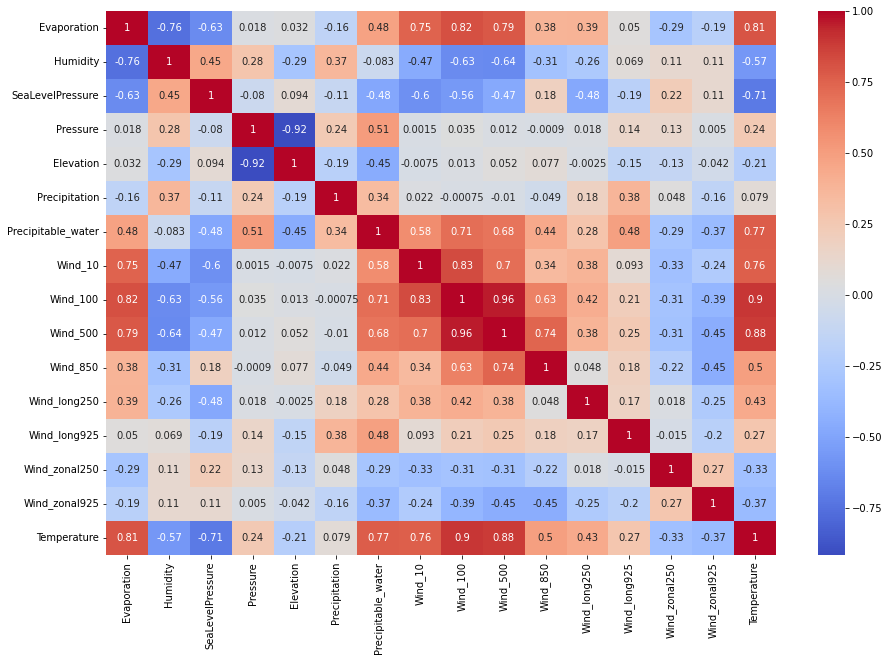

In [34]:
def CorrChart():
  plt.figure(figsize=(15,10))
  sns.heatmap(df_filtered.drop(columns={'startdate','lat','lon','climateregion','locations'}).corr(), annot=True, cmap='coolwarm')
  plt.show()

CorrChart()

Observations from the heatmap

1.High correlation between some features (|correlation|> 0.75):
- elevation and pressure = -0.92
- evaporation and humidity = -0.76
- evaporation and wind height 10 = 0.75
- wind height 10 and wind height 100 = 0.83
- evaporation and wind height 100 = 0.82
- evaporation and wind height 500 = 0.79
- wind height 100 and wind height 500 = 0.96

- temperature and evaporation = 0.81
- temperature and precipitable water = 0.77
- temperature and wind height 10 = 0.76
- temperature and wind height 100 = 0.9
- temperature and wind height 500 = 0.88

2.Low correlation between some features (|correlation|< 0.5):
- temperature and precipitation = 0.079
- temperature and elevation = -0.21
- temperature and pressure = 0.24
- temperature and longitudinal wind 250 = 0.43
- temperature and longitudinal wind 925 = 0.27
- temperature and zonal wind 250 = -0.33
- temperature and zonal wind 925 = -0.37

Since the features need to be independent from each other, high and low correlated features need to be excluded.

In [35]:
df_filtered = df_filtered.drop(columns={'Evaporation', 'Wind_10', 'Wind_500','Elevation', 'Precipitation', 'Pressure','Wind_long250', 
                                        'Wind_long925', 'Wind_zonal250','Wind_zonal925'})

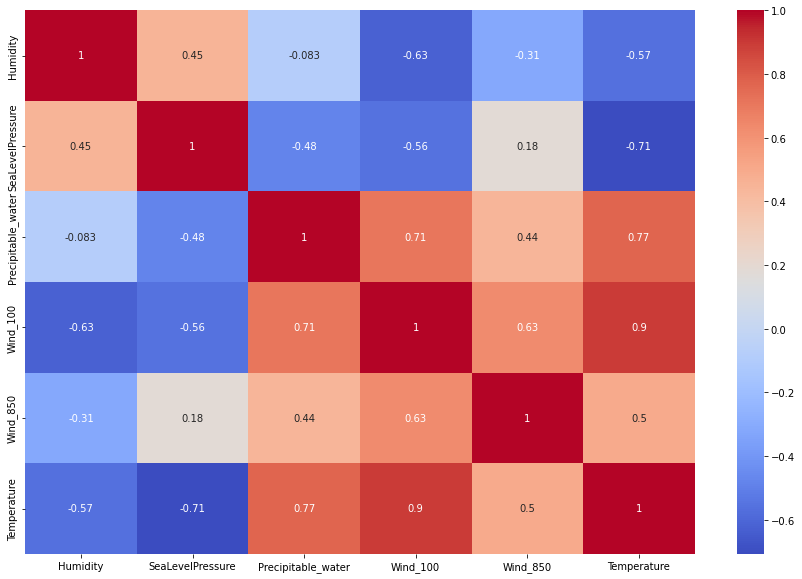

In [36]:
def CorrChart_update():
  plt.figure(figsize=(15,10))
  sns.heatmap(df_filtered.drop(columns={'startdate','lat','lon','climateregion','locations'}).corr(), annot=True, cmap='coolwarm')
  plt.show()

CorrChart_update()

Visualization of the top 5 features.

array([[<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>]], dtype=object)

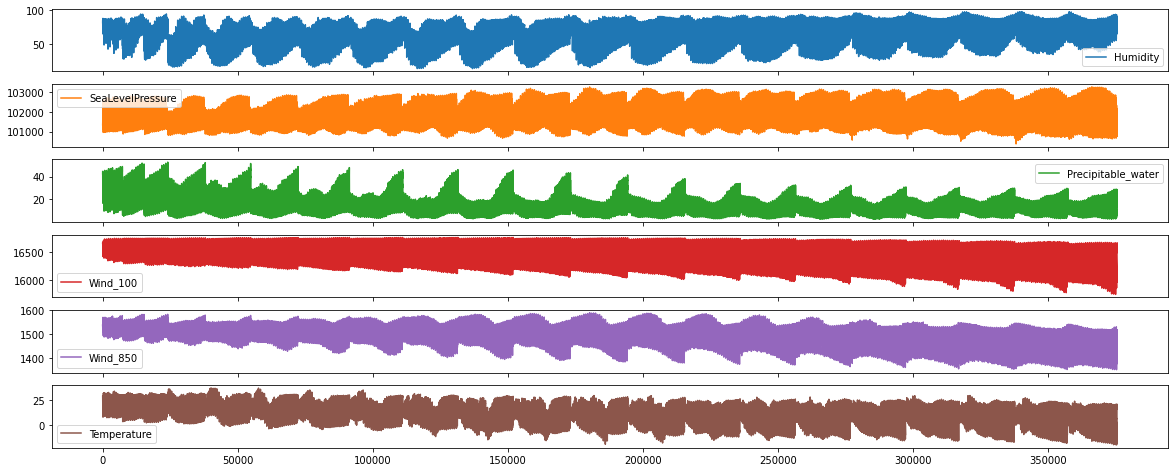

In [37]:
df_filtered.drop(columns={'startdate','lat','lon','startdate','climateregion','locations'}).plot(figsize=(20,15), subplots =True, layout=(len(df_filtered.columns),1))

## Model

### Modeling - Single Location

We have total of 514 and 14 climate regions. Experiment with one location first. 

In [38]:
location_number = 10
single_location = df_filtered[df_filtered['locations'] == location_number]
single_location.head()

,startdate,lat,lon,locations,climateregion,Humidity,SeaLevelPressure,Precipitable_water,Wind_100,Wind_850,Temperature
7310,2014-09-01,0.136364,0.666667,10,1,74.94,101289.29,32.73,16682.11,1518.69,23.050159
7311,2014-09-02,0.136364,0.666667,10,1,78.04,101349.20,33.88,16682.90,1522.12,22.645597
7312,2014-09-03,0.136364,0.666667,10,1,81.40,101402.42,35.34,16684.70,1525.84,22.382765
7313,2014-09-04,0.136364,0.666667,10,1,83.06,101424.82,36.33,16684.99,1527.41,22.242047
7314,2014-09-05,0.136364,0.666667,10,1,83.50,101422.60,36.52,16684.26,1527.29,22.305799


Visualize single location.

array([[<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>]], dtype=object)

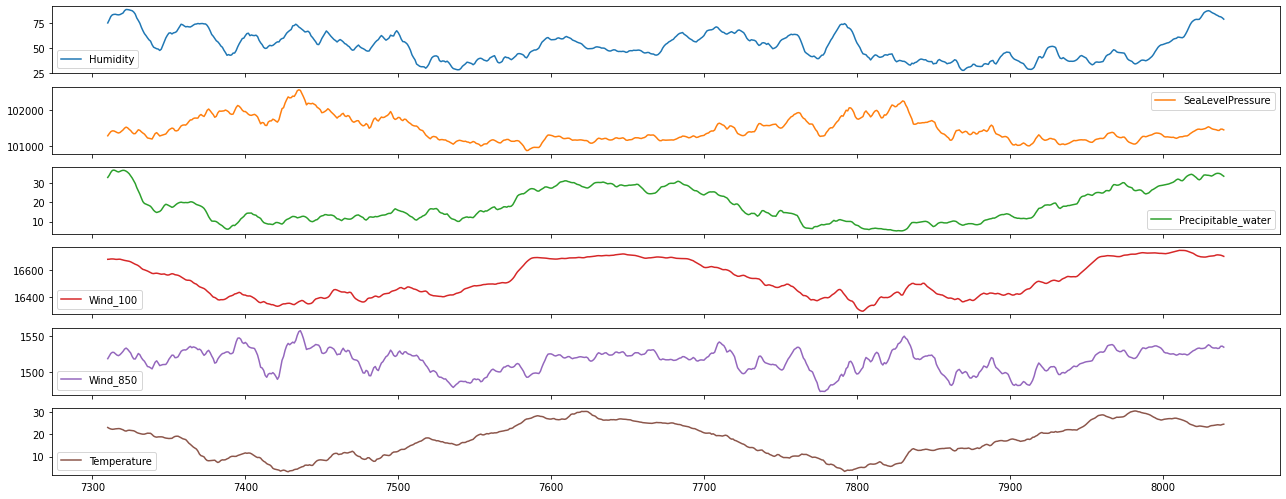

In [39]:
single_location.drop(columns={'lat','lon','startdate','climateregion','locations'}).plot(figsize=(22,16), subplots=True, layout=(len(single_location.columns),1))

Plot the varibles for single location.

array([[<AxesSubplot:title={'center':'Humidity'}>],
       [<AxesSubplot:title={'center':'SeaLevelPressure'}>],
       [<AxesSubplot:title={'center':'Precipitable_water'}>],
       [<AxesSubplot:title={'center':'Wind_100'}>],
       [<AxesSubplot:title={'center':'Wind_850'}>],
       [<AxesSubplot:title={'center':'Temperature'}>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>]], dtype=object)

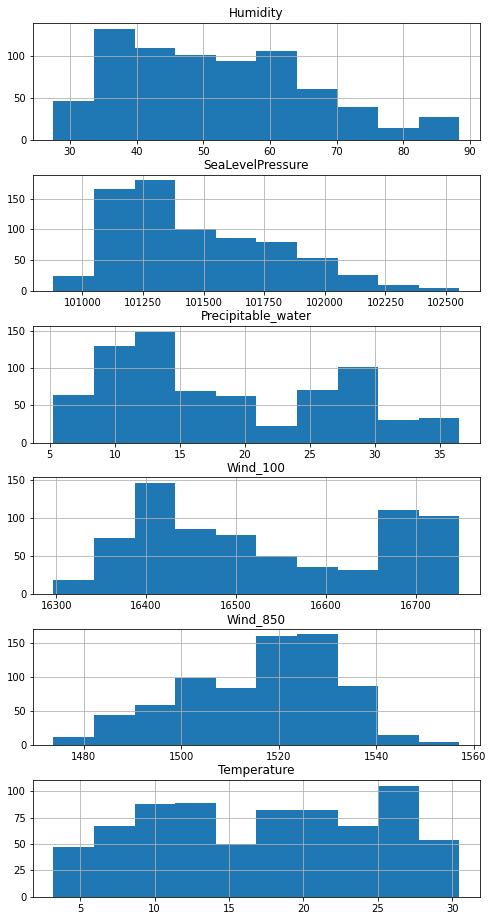

In [40]:
single_location.drop(columns={'lat','lon','startdate','climateregion','locations'}).hist(figsize=(8,30),layout=(len(single_location.columns),1))

In [41]:
# Take only necessary features for modeling
single_location = single_location.drop(columns={'lat','lon','climateregion','locations'}).set_index('startdate')
single_location.head()

,Humidity,SeaLevelPressure,Precipitable_water,Wind_100,Wind_850,Temperature
startdate,,,,,,
2014-09-01,74.94,101289.29,32.73,16682.11,1518.69,23.050159
2014-09-02,78.04,101349.20,33.88,16682.90,1522.12,22.645597
2014-09-03,81.40,101402.42,35.34,16684.70,1525.84,22.382765
2014-09-04,83.06,101424.82,36.33,16684.99,1527.41,22.242047
2014-09-05,83.50,101422.60,36.52,16684.26,1527.29,22.305799


In [42]:
single_location.shape

(731, 6)

In [43]:
TRAIN_SPLIT = int(len(single_location) * 0.8)
TRAIN_SPLIT

584

Remove the tail values for evaluation. 

In [44]:
validate = single_location[['Humidity',	'SeaLevelPressure','Precipitable_water','Wind_100','Wind_850','Temperature']].tail(14)
single_location.drop(single_location.tail(14).index,inplace=True)

In [45]:
def custom_ts_multi_data_prep(dataset, target, start, end, window, horizon, step):
  X = []
  y = []
  start = start + window
  
  if end is None:
    end = len(dataset) - horizon
  
  for i in range(start, end):
    indices = range(i-window, i, step)
    X.append(dataset[indices])
    #indicey = range(i+1, i+1+horizon)
    y.append(target[i:i+horizon])
  return np.array(X), np.array(y)

Normalize the features.

In [46]:
for i in single_location.select_dtypes('object').columns:
  le = LabelEncoder().fit(single_location[i])
  single_location[i] = le.transform(single_location[i])

X_scaler = MinMaxScaler()
Y_scaler = MinMaxScaler()
#X_data = X_scaler.fit_transform(single_location[['Humidity','SeaLevelPressure','Precipitable_water','Wind_100','Wind_850','Temperature']])
X_data = X_scaler.fit_transform(single_location[['Humidity','SeaLevelPressure','Precipitable_water','Wind_100','Wind_850']])
Y_data = Y_scaler.fit_transform(single_location[['Temperature']])

In [47]:
hist_window = 7  #previous days
horizon = 14  #future days
step = 1  #one measurement per day
start = 0
end = TRAIN_SPLIT

x_train, y_train = custom_ts_multi_data_prep(X_data, Y_data, start, end, hist_window, horizon, step)
x_val, y_val = custom_ts_multi_data_prep(X_data, Y_data, start, None, hist_window, horizon, step)

In [48]:
print('Multiple window of past history\n')
print(x_train[0])
print('\n Target horizon\n')
print(y_train[0])

Multiple window of past history

[[0.77912901 0.24382299 0.87868118 0.85286562 0.53930157]
 [0.83007395 0.27962992 0.91549296 0.85461511 0.58046322]
 [0.8852917  0.31143837 0.96222791 0.85860129 0.625105  ]
 [0.9125719  0.32482637 0.99391805 0.85924351 0.64394576]
 [0.91980279 0.32349953 1.         0.85762689 0.6425057 ]
 [0.92161052 0.3125381  0.99167734 0.85297635 0.62150486]
 [0.91520131 0.298403   0.97727273 0.85189122 0.59846394]]

 Target horizon

[[0.70987634]
 [0.70814947]
 [0.69903459]
 [0.68983602]
 [0.67449933]
 [0.66839994]
 [0.67899264]
 [0.68305377]
 [0.68012919]
 [0.67779905]
 [0.67337025]
 [0.66158472]
 [0.64480669]
 [0.63493541]]


In [49]:
batch_size = 16 
buffer_size = 10000 

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.cache().shuffle(buffer_size).batch(batch_size).repeat()

val_ds = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_ds = val_ds.batch(batch_size).repeat()

In [50]:
# MODELING
lstm_model=Sequential([   
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=x_train.shape[-2:]),
    tf.keras.layers.LSTM(32, return_sequences=True, activation='relu'),
    tf.keras.layers.LSTM(16, activation='softmax'),
    tf.keras.layers.Dense(units=horizon)
])

#optimizer = tf.keras.optimizers.RMSprop(clipvalue=1.0)
optimizer = tf.keras.optimizers.Adam()

model_path = '/content/drive/MyDrive/Projects/Omdena_xtreme_weather/lstm030723.{epoch:02d}-{val_loss:.2f}.h5'
early_stoppings = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
checkpoint = tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss',mode='max',save_best_only=True)
#reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.90 ** x)
callbacks = [early_stoppings,
             checkpoint]

lstm_model.compile(
    optimizer=optimizer, 
    loss='mse',
    #metrics = ['accuracy']
)

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 64)             17920     
                                                                 
 lstm_1 (LSTM)               (None, 7, 32)             12416     
                                                                 
 lstm_2 (LSTM)               (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 14)                238       
                                                                 
Total params: 33,710
Trainable params: 33,710
Non-trainable params: 0
_________________________________________________________________


In [51]:
epoch_steps = TRAIN_SPLIT #can also try 100 or 200

history = lstm_model.fit(train_ds,
                         epochs = 100, 
                         steps_per_epoch = epoch_steps,
                         validation_data=val_ds, 
                         validation_steps=50, 
                         #verbose=1,
                         callbacks=callbacks
                         )

Epoch 1/100
584/584 [==============================] - 27s 30ms/step - loss: 0.0689 - val_loss: 0.0185
Epoch 2/100
584/584 [==============================] - 15s 26ms/step - loss: 0.0094 - val_loss: 0.0073
Epoch 3/100
584/584 [==============================] - 15s 26ms/step - loss: 0.0068 - val_loss: 0.0058
Epoch 4/100
584/584 [==============================] - 16s 27ms/step - loss: 0.0055 - val_loss: 0.0048
Epoch 5/100
584/584 [==============================] - 15s 26ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 6/100
584/584 [==============================] - 15s 26ms/step - loss: 0.0037 - val_loss: 0.0045
Epoch 7/100
584/584 [==============================] - 15s 26ms/step - loss: 0.0036 - val_loss: 0.0042
Epoch 8/100
584/584 [==============================] - 15s 26ms/step - loss: 0.0034 - val_loss: 0.0036
Epoch 9/100
584/584 [==============================] - 16s 27ms/step - loss: 0.0029 - val_loss: 0.0031
Epoch 10/100
584/584 [==============================] - 16s 27ms/step - l

Invert scaling for forecast. 

In [52]:
#data_val = X_scaler.fit_transform(single_location[['Humidity','SeaLevelPressure','Precipitable_water','Wind_100','Wind_850','Temperature']].tail(7))
data_val = X_scaler.fit_transform(single_location[['Humidity','SeaLevelPressure','Precipitable_water','Wind_100','Wind_850']].tail(7))
val_rescaled = data_val.reshape(1, data_val.shape[0], data_val.shape[1])

pred = lstm_model.predict(val_rescaled)
pred

1/1 [==============================] - 1s 550ms/step


array([[0.52010685, 0.54288495, 0.5235757 , 0.4949    , 0.5156419 ,
        0.5037092 , 0.48985118, 0.47038078, 0.47231907, 0.43786234,
        0.45977056, 0.4606342 , 0.46928686, 0.46063548]], dtype=float32)

In [53]:
pred_Inverse = Y_scaler.inverse_transform(pred)
pred_Inverse[0]

array([17.388515, 18.009485, 17.483084, 16.701334, 17.266794, 16.941488,
       16.563694, 16.032898, 16.08574 , 15.14639 , 15.743646, 15.767189,
       16.003077, 15.767225], dtype=float32)

In [54]:
validate['Temperature']

startdate
2016-08-18    23.478400
2016-08-19    23.340419
2016-08-20    23.223349
2016-08-21    23.357477
2016-08-22    23.694901
2016-08-23    23.887702
2016-08-24    23.942453
2016-08-25    24.052925
2016-08-26    24.136444
2016-08-27    24.284901
2016-08-28    24.183578
2016-08-29    24.127011
2016-08-30    24.388200
2016-08-31    24.538612
Name: Temperature, dtype: float64

In [55]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
     def mean_absolute_percentage_error(y_true, y_pred): 
         y_true, y_pred = np.array(y_true), np.array(y_pred)
         return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
     
     print('Evaluation metric results:-')
     print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
     print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
     print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
     print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
     print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')  

timeseries_evaluation_metrics_func(validate['Temperature'], pred_Inverse[0])

Evaluation metric results:-
MSE is : 56.2707586199356
MAE is : 7.409700928451451
RMSE is : 7.501383780339172
MAPE is : 30.9302204540368
R2 is : -342.63142073337485



In [56]:
# Funcions for plotting the results

# Creating time steps for plotting
def create_time_steps(length):
  return list(range(-length,0))

# plotting predictions
def multi_step_plot(history, true_future, prediction, title):
  plt.figure(figsize=(10,5))
  num_in = create_time_steps(len(history))
  num_out = len(true_future)

  plt.plot(num_in, np.array(history[:,-1]), label='History')
  plt.plot(np.arange(num_out)/step, np.array(true_future), 'bo', label='True Future')
  if prediction.any():
    plt.plot(np.arange(num_out)/step, np.array(prediction), 'ro', label='Predicted Future')
  plt.legend(loc='upper left')
  plt.title(title)
  plt.show()

# plotting loss results
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()
  plt.title(title)
  plt.show()

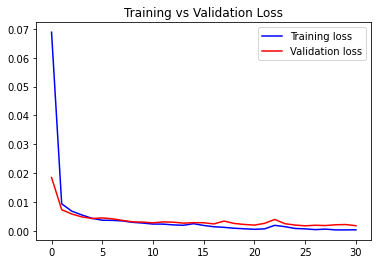

In [57]:
plot_train_history(history, 'Training vs Validation Loss')

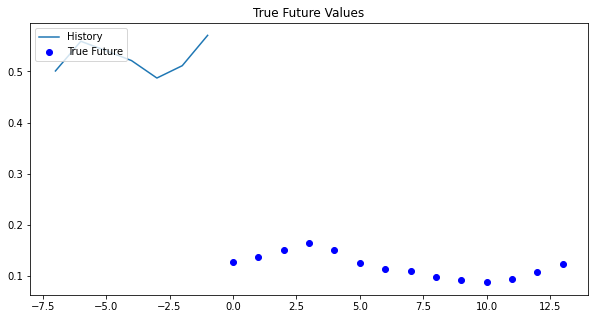

In [58]:
# the history and the future data are sampled everyday
for x, y in train_ds.take(1):
  multi_step_plot(x[0], y[0], np.array([0]), 'True Future Values')

1/1 [==============================] - 1s 757ms/step


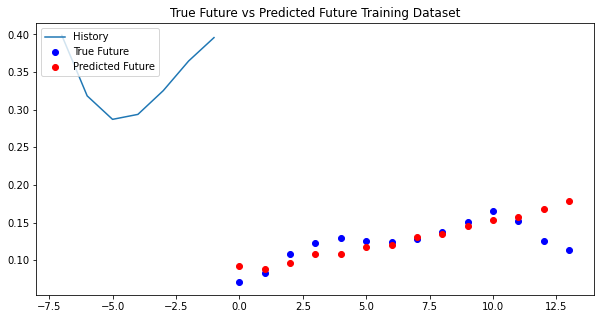

In [59]:
for x, y in train_ds.take(1):
  multi_step_plot(x[0], y[0], lstm_model.predict(x)[0], 'True Future vs Predicted Future Training Dataset')

1/1 [==============================] - 0s 24ms/step


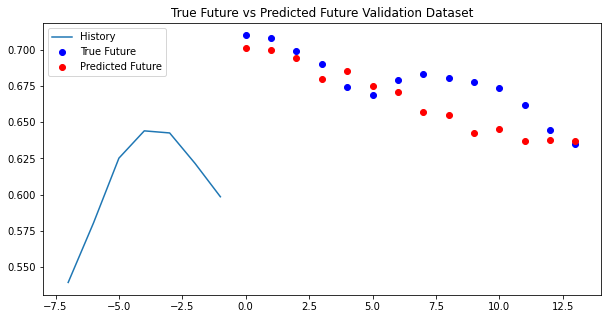

In [60]:
for x, y in val_ds.take(1):
  multi_step_plot(x[0], y[0], lstm_model.predict(x)[0],'True Future vs Predicted Future Validation Dataset')